In [92]:
import numpy as np
import scipy.interpolate as sp_inter
import matplotlib.pyplot as plt
from typing import Callable, List

In [3]:
%matplotlib notebook

# Problem 1 - Newman 6.11

## parts (b) & (c)

In [383]:
def overrelaxation_method(f, df, x0, w=0, err=1e-6):
    x = x0
    xx = (1+w)*f(x) - w*x
    _factor = (1 + w)*df(x) - w
    error = (xx - x)*_factor/(_factor - 1)
    N = 1
    while error > err:
        N += 1
        x = xx
        xx = (1+w)*f(x) - w*x
        _factor = (1 + w)*df(x) - w
        error = (xx - x)/(1 - 1/_factor)
    return xx, N

In [384]:
func = lambda x: 1 - np.exp(-2*x)
dfunc = lambda x: 2*np.exp(-2*x)

### Use the graph to make initial guess of solution

<IPython.core.display.Javascript object>


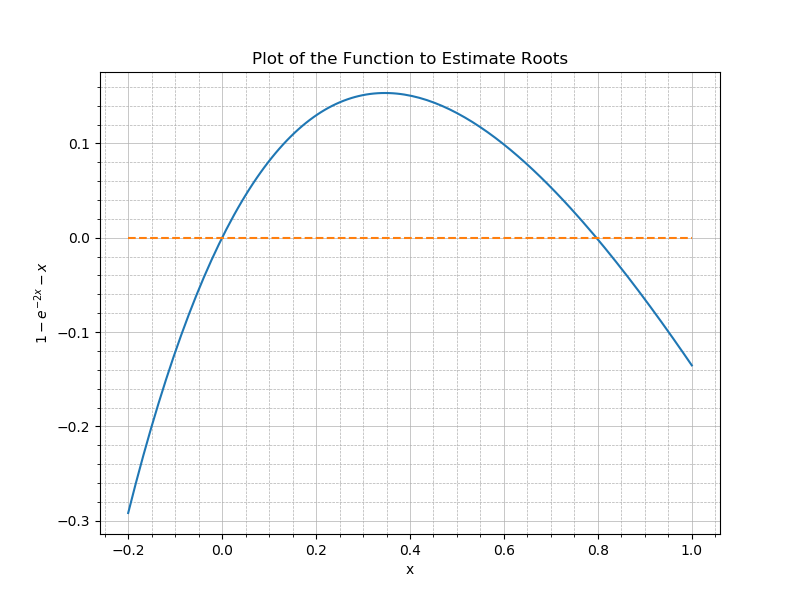

In [62]:
xvals = np.linspace(-0.2, 1, num=150, dtype=np.single)
    
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot()
ax.plot(xvals, func(xvals) - xvals)
ax.plot(xvals, 0*xvals, '--')
ax.set_xlabel("x")
ax.set_ylabel("$1 - e^{-2x} - x$")
ax.set_title("Plot of the Function to Estimate Roots")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

## part (b)

In [385]:
overrelaxation_method(func, dfunc, 1, 0) # Normal relaxation

(0.7968126311118457, 14)

## part (c)

In [403]:
overrelaxation_method(func, dfunc, 1, 0.37) # Overrelaxation

(0.7968128361269003, 7)

# Problem 2 - Newman 6.13

## part (b)

In [34]:
def binary_search(f, x1, x2, err=1e-6):
    if np.sign(f(x1)) == np.sign(f(x2)):
        return "Failed to give proper initial estimate"
    error = np.abs(x1 - x2)
    while error > err:
        xx = 0.5 * (x1 + x2)
        if np.sign(f(xx)) == np.sign(f(x1)):
            x1 = xx
        else:
            x2 = xx
        error = np.abs(x1 - x2)
    return 0.5 * (x1 + x2)

In [73]:
func = lambda x: 5*np.exp(-x) + x - 5

### Use the graph to make initial guess of solution

<IPython.core.display.Javascript object>


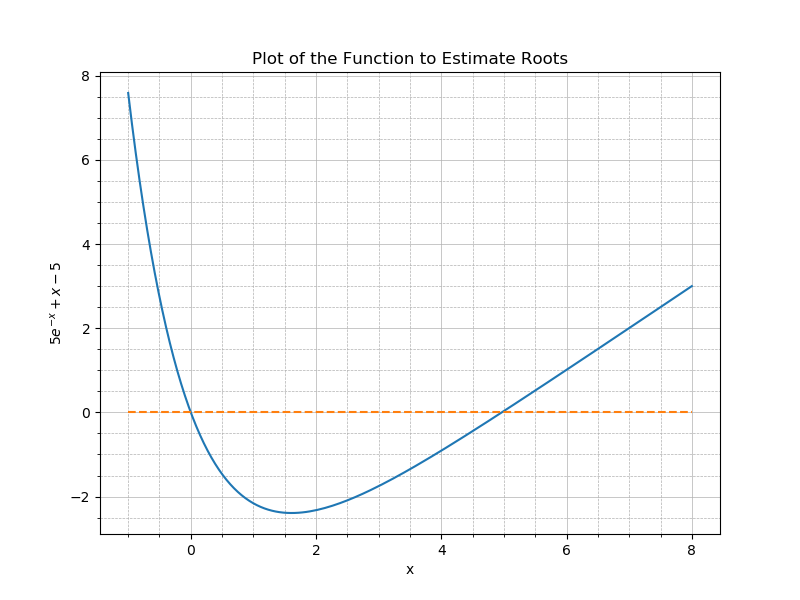

In [53]:
xvals = np.linspace(-1, 8, num=150, dtype=np.single)
    
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot()
ax.plot(xvals, func(xvals))
ax.plot(xvals, 0*xvals, '--')
ax.set_xlabel("x")
ax.set_ylabel("$5e^{-x} + x - 5$")
ax.set_title("Plot of the Function to Estimate Roots")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

In [37]:
# Define constants but combine powers based on the fraction to be calculated
c = 299792458
h = 6.62606896e-11
k = 1.3806504
a = h*c / k

In [74]:
x_root = binary_search(func, 4, 6)
x_root

4.965114116668701

In [85]:
b = a / x_root
print("Estimate of Wien displacement constant is b={:.9f}".format(b))

Estimate of Wien displacement constant is b=0.002897769


## part (c)

we have $T  = \frac{b}{T}$ so for us this gives

In [87]:
print("Estimated surface temperature of the sun is {:.5f} Kelvin".format(b / 502e-9))

Estimated surface temperature of the sun is 5772.44734 Kelvin


# Problem 3

In [555]:
def extrapolated_difference(f: Callable[[float], float], x: float, h: float):
    return (8*f(x+h) - 8*f(x-h) + f(x - 2*h) - f(x + 2*h)) / (12*h)

## Define a function that calculates the gradient

In [554]:
def gradient(f: Callable[[List[float]], float], params: List[float], h: float) -> np.array:
    partials = []
    for i in range(len(params)):
        def fixed_func(x):
            inputs = [params[j] if j != i else x for j in range(len(params))]
            return f(inputs)
        partials.append(extrapolated_difference(fixed_func, params[i], h))
    return np.array(partials)

## Define the loop to perform gradient descent to a certain level of precision

In [556]:
def gradient_descent(f: Callable[[List[float]], float], initial_params: List[float],
                     learning_rate=0.1, grad_step_size=1e-1, err=1e-6, max_iter=200):
    params = np.array(initial_params, dtype=np.double)
    grad = gradient(f, params, grad_step_size)
    current_iter = 0
    every_error = [np.sqrt(grad.dot(grad)),]
    param_evolution = [params.copy(),]
    while every_error[-1] > err:
        current_iter += 1
        params -= learning_rate*grad
        grad = gradient(f, params, grad_step_size)
        
        param_evolution.append(params.copy())
        every_error.append(np.sqrt(grad.dot(grad)))
        if current_iter >= max_iter:
            break
    return np.array(param_evolution), np.array(every_error) # final parameters, errors

## Test function: $f(x,y) = (x-2)^2 + (y-2)^2$

In [557]:
def test_func(x): return (x[0]-2)**2 + (x[1]-2)**2

In [558]:
gradient(test_func, np.array([1, 4]), 0.1)

array([-2.,  4.])

In [559]:
results = gradient_descent(test_func, [100,-40])

<IPython.core.display.Javascript object>


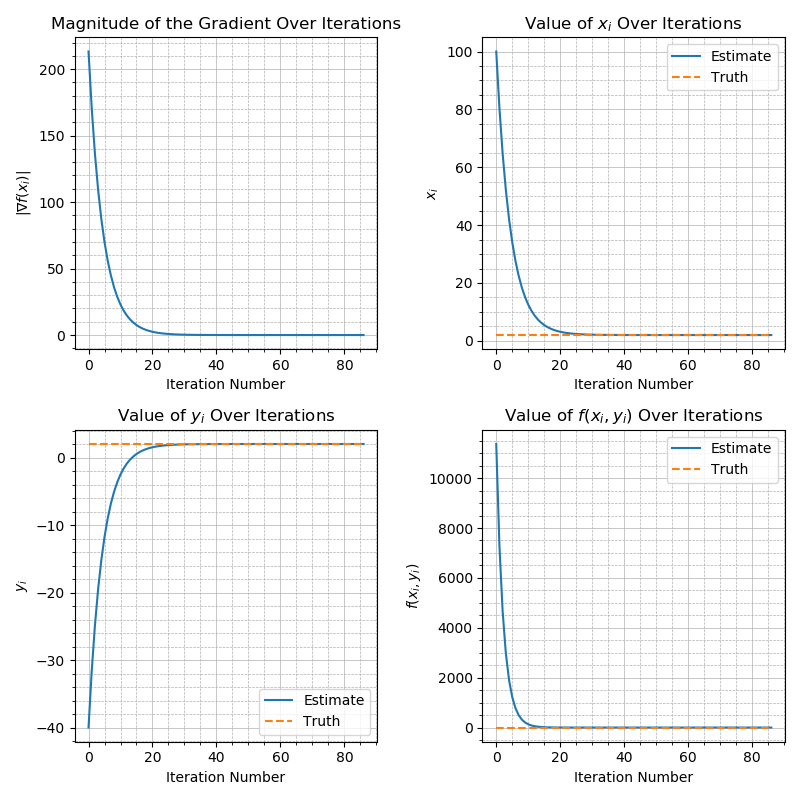

In [668]:
fig = plt.figure()
fig.set_size_inches(8,8)

ax = fig.add_subplot(221)
ax.plot(range(results[1].shape[0]), results[1])
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$|\nabla f(x_i)|$")
ax.set_title("Magnitude of the Gradient Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

ax = fig.add_subplot(222)
ax.plot(range(results[0].shape[0]), results[0][:, 0], label="Estimate")
ax.plot(range(results[1].shape[0]), 2*np.ones(results[1].shape[0]), '--', label="Truth")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$x_i$")
ax.set_title("Value of $x_i$ Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(223)
ax.plot(range(results[1].shape[0]), results[0][:, 1], label="Estimate")
ax.plot(range(results[1].shape[0]), 2*np.ones(results[1].shape[0]), '--', label="Truth")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$y_i$")
ax.set_title("Value of $y_i$ Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(224)
ax.plot(range(results[1].shape[0]), [test_func(results[0][i]) for i in range(results[0].shape[0])],
        label="Estimate")
ax.plot(range(results[1].shape[0]), np.zeros(results[1].shape[0]), '--', label="Truth")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$f(x_i, y_i)$")
ax.set_title("Value of $f(x_i, y_i)$ Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

fig.tight_layout()
fig.savefig("example_grad.png")

## Now for the Schechter function

In [621]:
def schechter(Mgal, M, phi, a):
    MM = pow(10, M)
    pp = pow(10, phi)
    return pp * pow(Mgal / MM, a+1) * np.exp(-Mgal / MM) * np.log(10)

## Load the dataset and define $\chi^2$

In [622]:
dataset = np.loadtxt("smf_cosmos.dat")
def chi2(params, f=schechter, dataset=dataset):
    return sum([pow(f(pow(10, dataset[i, 0]), *params) - dataset[i, 1], 2) / pow(dataset[i, 2], 2) for i in range(dataset.shape[0])])

In [623]:
def log_chi2(params):
    return np.log(chi2(params))

## Run three trials from three different initializations in parameter space

In [624]:
results2 = gradient_descent(log_chi2, [11.5, -3.2, -0.5], learning_rate=3e-3, max_iter=5e3)

In [656]:
results3 = gradient_descent(log_chi2, [12.5, -1, -4], learning_rate=3e-3, max_iter=5e3)

In [643]:
results4 = gradient_descent(log_chi2, [10.5, -0.5, 1.5], learning_rate=3e-3, max_iter=5e3)

<IPython.core.display.Javascript object>


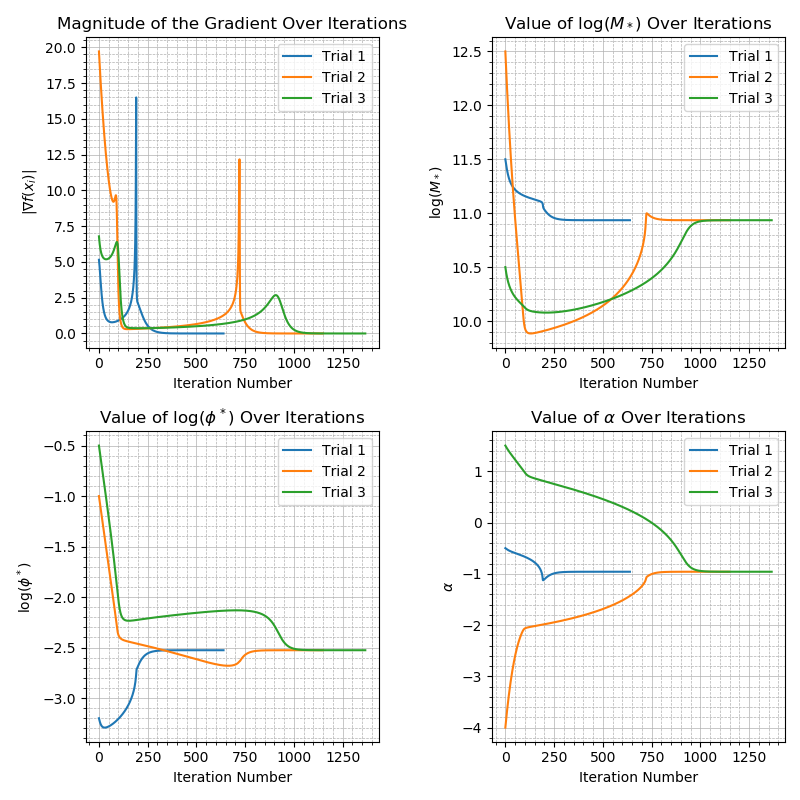

In [669]:
fig = plt.figure()
fig.set_size_inches(8,8)

ax = fig.add_subplot(221)
ax.plot(range(results2[1].shape[0]), results2[1], label="Trial 1")
ax.plot(range(results3[1].shape[0]), results3[1], label="Trial 2")
ax.plot(range(results4[1].shape[0]), results4[1], label="Trial 3")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$|\nabla f(x_i)|$")
ax.set_title("Magnitude of the Gradient Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(222)
ax.plot(range(results2[0].shape[0]), results2[0][:, 0], label="Trial 1")
ax.plot(range(results3[0].shape[0]), results3[0][:, 0], label="Trial 2")
ax.plot(range(results4[0].shape[0]), results4[0][:, 0], label="Trial 3")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$\log(M_*)$")
ax.set_title("Value of $\log(M_*)$ Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(223)
ax.plot(range(results2[1].shape[0]), results2[0][:, 1], label="Trial 1")
ax.plot(range(results3[1].shape[0]), results3[0][:, 1], label="Trial 2")
ax.plot(range(results4[1].shape[0]), results4[0][:, 1], label="Trial 3")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$\log(\phi^*)$")
ax.set_title("Value of $\log(\phi^*)$ Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(224)
ax.plot(range(results2[1].shape[0]), results2[0][:, 2], label="Trial 1")
ax.plot(range(results3[1].shape[0]), results3[0][:, 2], label="Trial 2")
ax.plot(range(results4[1].shape[0]), results4[0][:, 2], label="Trial 3")
ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$\alpha$")
ax.set_title(r"Value of $\alpha$ Over Iterations")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

fig.tight_layout()
fig.savefig("evolution_plot.png")

<IPython.core.display.Javascript object>


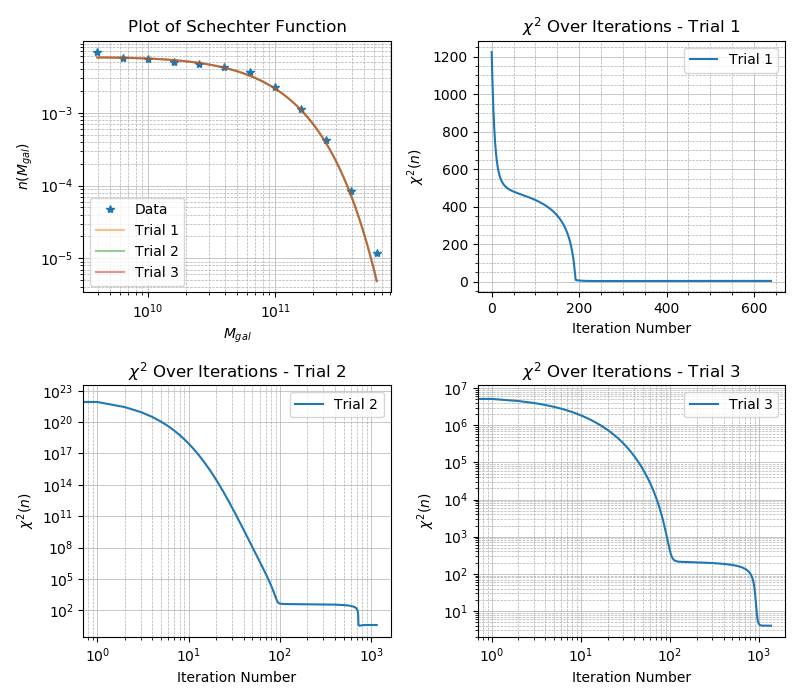

In [667]:
fig = plt.figure()
fig.set_size_inches(8,7)

xspace = np.geomspace(np.power(10, min(dataset[:, 0])), np.power(10, max(dataset[:, 0])), 100)

ax = fig.add_subplot(221)
ax.plot(np.power(10, dataset[:, 0]), dataset[:, 1], '*', label="Data")
ax.plot(xspace, [schechter(x, *results2[0][-1]) for x in xspace], label="Trial 1", alpha=0.5)
ax.plot(xspace, [schechter(x, *results3[0][-1]) for x in xspace], label="Trial 2", alpha=0.5)
ax.plot(xspace, [schechter(x, *results4[0][-1]) for x in xspace], label="Trial 3", alpha=0.5)
ax.set_xlabel("$M_{gal}$")
ax.set_ylabel("$n(M_{gal})$")
ax.set_title("Plot of Schechter Function")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(222)
ax.plot(range(results2[0].shape[0]), [chi2(results2[0][i]) for i in range(results2[0].shape[0])], label="Trial 1")

ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$\chi^2(n)$")
ax.set_title("$\chi^2$ Over Iterations - Trial 1")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(223)
ax.plot(range(results3[0].shape[0]), [chi2(results3[0][i]) for i in range(results3[0].shape[0])], label="Trial 2")

ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$\chi^2(n)$")
ax.set_title("$\chi^2$ Over Iterations - Trial 2")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

ax = fig.add_subplot(224)
ax.plot(range(results4[0].shape[0]), [chi2(results4[0][i]) for i in range(results4[0].shape[0])], label="Trial 3")

ax.set_xlabel("Iteration Number")
ax.set_ylabel(r"$\chi^2(n)$")
ax.set_title("$\chi^2$ Over Iterations - Trial 3")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')
ax.legend()

fig.tight_layout()
fig.savefig("fit_plots.png")